In [1]:
# First load xi(r) kernel
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
xi_data=np.loadtxt('../xi_functions/QPM_Mash.xi',skiprows=2)
xi_r=np.genfromtxt('../xi_functions/QPM_Mash.xi',max_rows=1)
xi_mu=np.genfromtxt('../xi_functions/QPM_Mash.xi',skip_header=1,max_rows=1)

In [4]:
xi1d=xi_data.mean(axis=1)

In [191]:
from scipy.interpolate import interp1d
spl=interp1d(xi_r,xi1d)

def xi_func(r):
    if r<min(xi_r):
        return 0.
    if r<max(xi_r):
        xi_tmp=spl(r)
    if ((r>max(xi_r))or(xi_tmp<1e-3)):
        xi_tmp = 10./r**2.
    return xi_tmp
    

(0, 150)

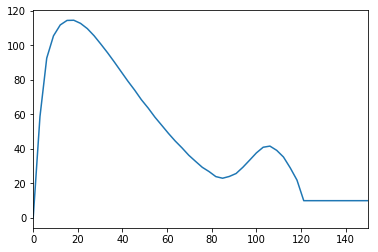

In [193]:
xis=[xi_func(nn) for nn in ns]
plt.plot(ns,xis*ns*ns)
plt.xlim([0,150])

In [189]:
def model_xi(r,a):
    return a/r**2.

from scipy.optimize import curve_fit
a=curve_fit(model_xi,xi_r[xi1d>0],xi1d[xi1d>0])[0]

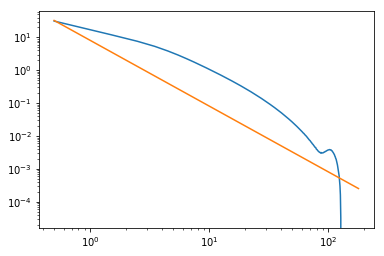

In [190]:
plt.plot(xi_r,xi1d)
plt.plot(xi_r,model_xi(xi_r,a=a))
plt.yscale('log')
plt.xscale('log')

In [108]:
ns=np.linspace(0.,300,100)
ints=np.zeros_like(ns)

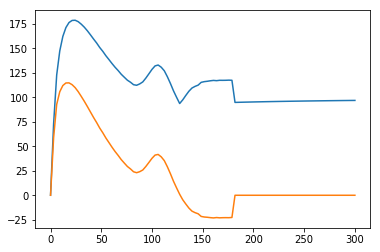

In [127]:
xis=[xi_integ(nn) for nn in ns]
xis2=[xi_func(nn) for nn in ns]
plt.plot(ns,xis*ns*ns)
plt.plot(ns,xis2*ns*ns)

In [146]:
n_single=np.arange(0,200,20)
n_double=np.zeros((len(n_single),len(n_single)))
for i in range(len(n_single)):
    for j in range(len(n_single)):
        n_double[i,j]=np.sqrt(n_single[i]**2.+n_single[j]**2.)

In [149]:
n_flat=n_double.flatten()

In [194]:
xi_integ = lambda r: np.abs(xi_func(r))#+100./pow(r+5.,2.)
for i,ni in enumerate(n_flat):
    n=ni
    R=20.
    if n>0:
        factor1 = lambda r: pow((r+n)/(2.*R),2.)
        factor2 = lambda r: pow((r-n)/(2.*R),2.)
        integrand = lambda r: r/(n*R)*(np.exp(-factor2(r))-np.exp(-factor1(r)))*xi_integ(r)
    else:
        integrand = lambda r: r**2./R**3.*np.exp(-pow((r/2.*R),2.))*xi_integ(r)
    #xi_integ(r)*r*(np.exp(-pow((r-n)/(2.*R),2.))-np.exp(-pow((r+n)/(2.*R),2.)))/n
    
    ints[i]=quad(integrand,0,10000)[0]

In [195]:
ints_r2=np.zeros_like(n_flat)
from scipy.special import dawsn
for i,ni in enumerate(n_flat):
    n=ni
    R=20.
    a=R*2.
    if n>0:
        ints_r2[i]=dawsn(n/a)/(n*a)
    else:
        ints_r2[i]=1./a**2.

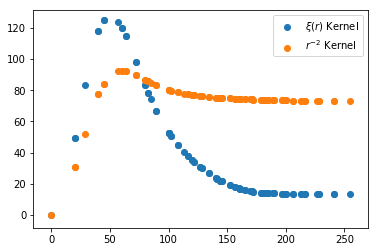

In [199]:
plt.scatter(n_flat,ints/np.sum(ints)*n_flat*n_flat,label=r'$\xi(r)$ Kernel')
plt.scatter(n_flat,ints_r2/np.sum(ints_r2)*n_flat*n_flat,label=r'$r^{-2}$ Kernel')
plt.legend();